In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from functions_parameters.tools import rot_symm_m_check_d, translation_check_d, array_print
from itertools import product

In [2]:
final_result = np.load('schf_filling_0p8_t_4_em4_mesh_30_2_2_rerun.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

u_arr = final_result['u']
v1_arr = u_arr
u_mesh, v1_mesh = np.meshgrid(u_arr, v1_arr, indexing = 'ij')

In [3]:
np.max(final_c_difference)

np.float64(0.24872546890167835)

In [4]:
np.max(final_e_difference)

np.float64(1.1760067624155823e-06)

In [5]:
np.all(np.logical_not(any_bi_fail))

np.True_

## combine witht the original data set

In [6]:
final_result_old = np.load('schf_filling_0p8_t_4_em4_random_basis_mesh_30_2_2.npz')


final_ground_state_e_diff_density_old = final_result_old['gse']
final_density_old = final_result_old['d']
final_bond_old = final_result_old['bond']
final_e_difference_old = final_result_old['e_diff']
final_c_difference_old = final_result_old['c_diff']
final_e_fermi_old = final_result_old['e_fermi']
final_iteration_old = final_result_old['iters']
any_bi_fail_old = final_result_old['any_bi_fail']

In [7]:
final_ground_state_e_diff_density = np.concatenate((final_ground_state_e_diff_density, final_ground_state_e_diff_density_old), axis=2)
final_density = np.concatenate((final_density, final_density_old), axis=2)
final_bond = np.concatenate((final_bond, final_bond_old), axis=2)
final_e_difference = np.concatenate((final_e_difference, final_e_difference_old), axis=2)
final_c_difference = np.concatenate((final_c_difference, final_c_difference_old), axis=2)
final_e_fermi = np.concatenate((final_e_fermi, final_e_fermi_old), axis=2)
final_iteration = np.concatenate((final_iteration, final_iteration_old), axis=2)
any_bi_fail = np.concatenate((any_bi_fail, any_bi_fail_old), axis=2)

### Some points do not converge

In [8]:
index_c_diff = np.where(np.abs(final_c_difference)>1E-4)
final_ground_state_e_diff_density[index_c_diff] = 0
index_e_diff = np.where(np.abs(final_e_difference)>1E-4)
final_ground_state_e_diff_density[index_e_diff] = 0

In [9]:
index_c_diff

(array([ 1,  2,  2,  2,  2,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14,
        14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15]),
 array([ 6,  8,  8,  9, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  8,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  8,  8, 13,  0,  0

In [10]:
final_c_difference[index_c_diff]

array([2.74672474e-03, 2.60142632e-04, 9.75054707e-04, 1.23727645e-04,
       2.06191405e-04, 1.80828192e-02, 1.80877462e-02, 1.80877462e-02,
       1.28025935e-02, 1.28025934e-02, 1.80877457e-02, 1.80877462e-02,
       1.80877462e-02, 1.80877462e-02, 6.15164209e-04, 1.16819520e-04,
       4.49776075e-02, 4.49776075e-02, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.49776075e-02, 4.49776075e-02, 4.49776075e-02,
       4.49776075e-02, 4.35180159e-04, 7.50054686e-02, 7.50054686e-02,
       7.50054686e-02, 7.50054686e-02, 7.50054686e-02, 7.50054686e-02,
       7.50054686e-02, 7.50054686e-02, 7.50054686e-02, 5.16559830e-04,
       1.09952978e-01, 1.09952978e-01, 1.09952978e-01, 1.09952978e-01,
       1.09952978e-01, 1.09952978e-01, 1.09952978e-01, 1.09952978e-01,
       1.09952978e-01, 2.98099462e-04, 1.42966533e-01, 1.42966533e-01,
       1.42966533e-01, 1.42966533e-01, 1.42966533e-01, 1.42966533e-01,
       1.42966533e-01, 1.42966533e-01, 1.42966533e-01, 3.08930399e-04,
      

### Phase Analysis

In [11]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_bond = np.take_along_axis(final_bond, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)

In [12]:
from functions_parameters.universal_parameters import phase_tot, threshold, c_6_2_uc, c_3_2_uc, c_2_2_uc, translation_a1, translation_a2, translation_a3
from functions_parameters.tools import phase_check_nematic_magnetic

In [13]:
phase_diagram_based_on_d = np.zeros((u_mesh.shape))
nematic_measure = np.zeros((u_mesh.shape), np.float64)
ts_check = np.zeros((u_mesh.shape), np.int32)
f_phase = np.zeros((u_mesh.shape), np.int32)
f_measure = np.zeros((u_mesh.shape), np.float64)
f_max_measure = np.zeros((u_mesh.shape), np.float64)

for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        d_ij = sorted_density[i,j,0]
        ts_recording = np.zeros((3))
        ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
        if np.all(ts_diff_arr<threshold):
            ts_recording[0] = 1
        elif np.all(ts_diff_arr>threshold):
            ts_recording[-1] = 1
        else:
            ts_recording[1] = 1
        ts_check[i,j] = np.argmax(ts_recording)
        rs_recording, m_recording, c6_diff, magnetism_arr = phase_check_nematic_magnetic(d_ij, c_6_2_uc, c_3_2_uc, c_2_2_uc)
        nematic_measure[i,j] = c6_diff
        f_phase[i,j] = np.argmax(m_recording)
        f_measure[i,j] = np.mean(np.abs(magnetism_arr))
        f_max_measure[i,j] = np.max(np.abs(magnetism_arr))
        phase_arr = np.kron(ts_recording,rs_recording)
        phase_arr = np.kron(phase_arr,m_recording)
        phase = np.argmax(phase_arr)
        phase_diagram_based_on_d[i,j] = phase

unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_tot[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 0.8')

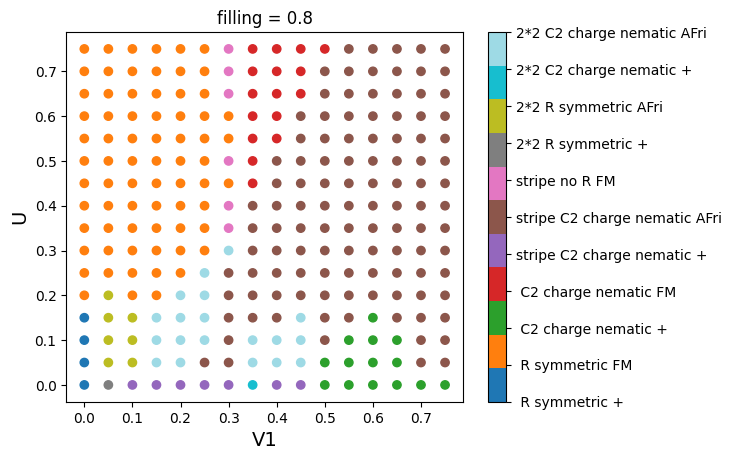

In [14]:
cmap = plt.get_cmap("tab20", len(unique_phase_index))
plt.scatter(v1_mesh, u_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('V1', size = '14')
plt.ylabel('U', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 0.8')

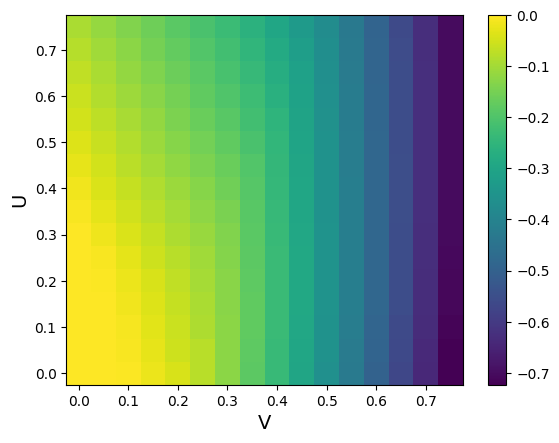

In [15]:
plt.pcolormesh(v1_mesh,u_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()

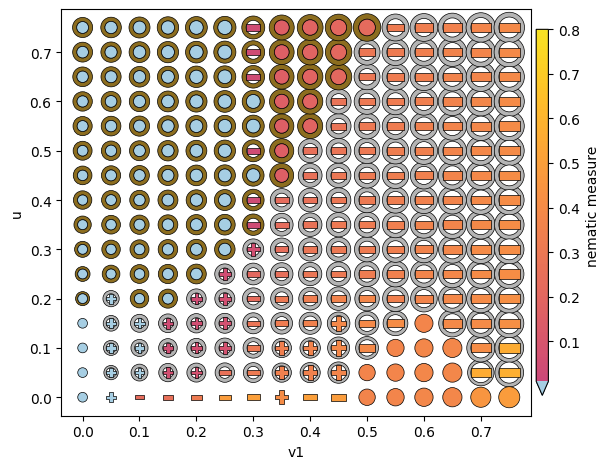

In [16]:
from functions_parameters.phase_plot import PlotConfig, plot_phase_map

CFG = PlotConfig(nem_vmax=0.8)
fig, ax = plt.subplots()
plot_phase_map(
    fig,
    ax,
    v1_mesh, u_mesh,
    sorted_ground_state_e/4,               # [...,0] read inside
    nematic_measure,
    ts_check, f_phase,
    f_max_measure,                       # or f_measure if you prefer mean
    cfg=CFG,
)
ax.set_xlabel("v1")
ax.set_ylabel("u")
plt.tight_layout(); plt.show()

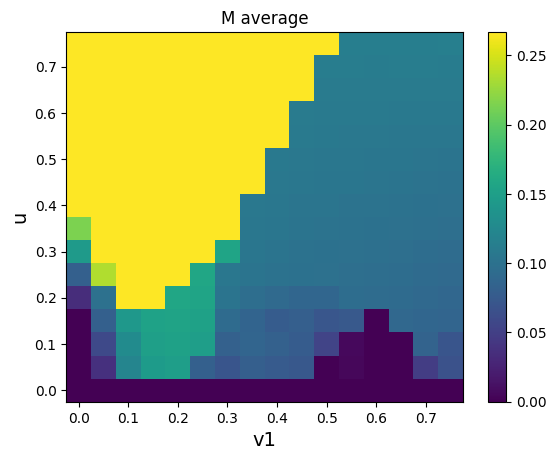

In [17]:
plt.pcolormesh(v1_mesh, u_mesh, f_measure)
plt.colorbar()
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
plt.title('M average')
plt.show()

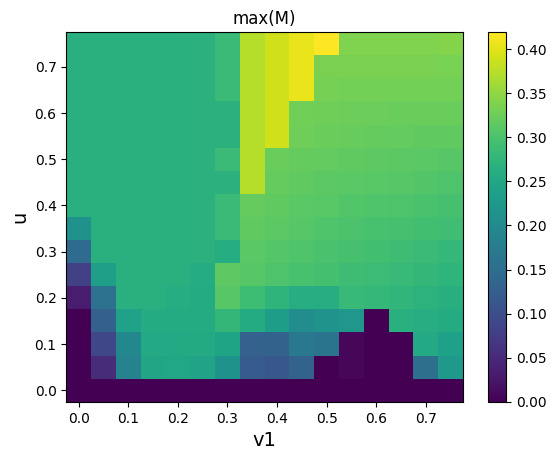

In [18]:
plt.pcolormesh(v1_mesh, u_mesh, f_max_measure)
plt.colorbar()
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
plt.title('max(M)')
plt.show()

# check if any of the points on the phase diagram in under convergence

In [19]:
sorted_e_difference.shape

(16, 16, 30)

In [20]:
index=np.where(np.logical_or(sorted_e_difference[:,:,0]>1E-8, sorted_c_difference[:,:,0]>1E-7))

In [21]:
for i in range(len(index[0])):
    print(index[0][i],index[1][i],sorted_c_difference[index[0][i],index[1][i],0], sorted_e_difference[index[0][i],index[1][i],0])

0 7 1.4211087179250015e-07 2.017279676636008e-10
1 6 8.579749278259108e-07 2.4439590351477136e-09
3 9 1.5047567644616011e-05 4.030017941580866e-08
3 10 1.0311259336648337e-07 3.360867140145274e-12
4 8 1.1775576785055808e-06 6.1884453117500016e-09
7 8 1.5142623280284262e-07 6.073808123119306e-11
14 8 1.08086698961396e-05 1.4202963249942968e-08
14 15 1.3636516687509648e-06 4.840238432279875e-09


In [22]:
sorted_ground_state_e[0,8]

array([-0.23731761, -0.23528492, -0.23528492, -0.23528492, -0.23528492,
       -0.23528492, -0.23528492, -0.23528492, -0.23528492, -0.23528492,
       -0.23528492, -0.23528492, -0.23528492, -0.23528492, -0.23528492,
       -0.17923381,  0.04139186,  0.04139186,  0.04139186,  0.04139186,
        0.04139186,  0.04139186,  0.04139186,  0.04139186,  0.04139186,
        0.04139186,  0.04139186,  0.04139186,  0.04139186,  0.04139186])

### Check the degeneracy

In [23]:
# first find if there are energy states that are highly degenerate as the known ground state while in the different phase
states_index = np.where(np.logical_and(sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]<1E-4, sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]>1E-7))
# then find out the states that are in a different phase than the known ground state
states_index_len = len(states_index[0])
degenerate_state_diagram = -np.ones(final_c_difference.shape, dtype=np.int32)
for index in range(states_index_len):
    i = states_index[0][index]
    j = states_index[1][index]
    k = states_index[2][index]
    d_ij = sorted_density[i,j,k]
    ts_recording = np.zeros((3))
    ts_diff_arr = translation_check_d(d_ij, translation_a1, translation_a2, translation_a3)
    if np.all(ts_diff_arr<threshold):
        ts_recording[0] = 1
    elif np.all(ts_diff_arr>threshold):
        ts_recording[-1] = 1
    else:
        ts_recording[1] = 1
    rs_recording, m_recording, c6_diff, magnetism_arr = phase_check_nematic_magnetic(d_ij, c_6_2_uc, c_3_2_uc, c_2_2_uc)
    phase_arr = np.kron(ts_recording,rs_recording)
    phase_arr = np.kron(phase_arr,m_recording)
    phase = np.argmax(phase_arr)
    if phase != phase_diagram_based_on_d[i,j] and phase not in degenerate_state_diagram[i,j]:
        degenerate_state_diagram[i,j,k]=phase

In [24]:
degenerate_index = np.where(degenerate_state_diagram>0)

In [25]:
degenerate_index


(array([ 1,  1,  2,  6,  7,  7,  8,  8,  9, 10, 10, 11, 12, 13, 13, 14, 14,
        15, 15]),
 array([1, 2, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]),
 array([15, 11,  3,  1,  2,  8,  1,  7,  7,  1,  7,  6,  6,  1,  8,  1,  9,
         1,  9]))

In [26]:
unique_phase_index_degenerate = np.unique(degenerate_state_diagram)
unique_phase_name_degenerate = [phase_tot[i] for i in np.int_(unique_phase_index_degenerate) if i != -1]

In [27]:
unique_phase_name_degenerate

[' R symmetric +',
 ' R symmetric FM',
 'stripe R symmetric AFri',
 'stripe C2 charge nematic AFri',
 '2*2 no R FM']

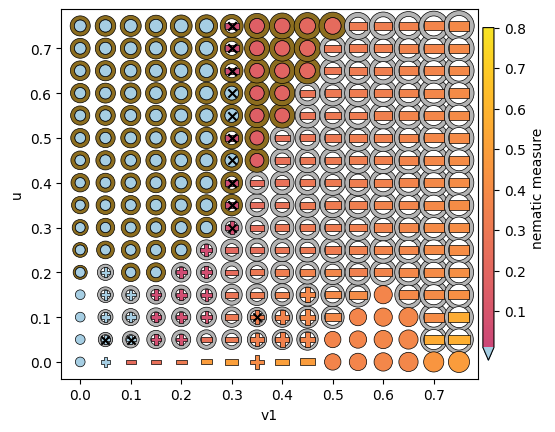

In [28]:
fig, ax = plt.subplots()
plot_phase_map(
    fig,
    ax,
    v1_mesh, u_mesh,
    sorted_ground_state_e/4,               # [...,0] read inside
    nematic_measure,
    ts_check, f_phase,
    f_max_measure,                       # or f_measure if you prefer mean
    cfg=CFG,
)
ax.set_xlabel("v1")
ax.set_ylabel("u")
ax.scatter(v1_arr[degenerate_index[1]], u_arr[degenerate_index[0]], marker='x', color='black', zorder=10)

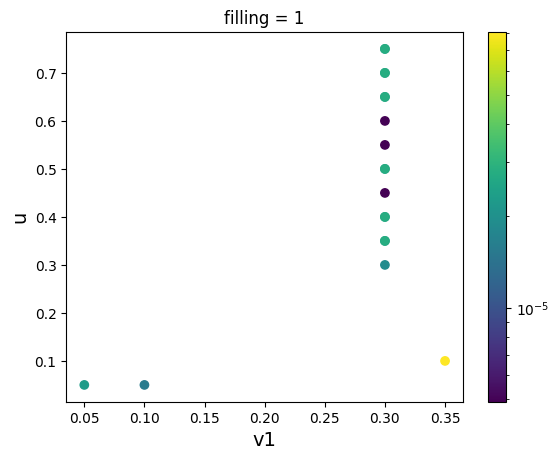

In [33]:
import matplotlib

plt.scatter(v1_arr[degenerate_index[1]], u_arr[degenerate_index[0]], c=sorted_ground_state_e[degenerate_index]-sorted_ground_state_e[degenerate_index[0],degenerate_index[1],0],zorder=10,marker='o',cmap='viridis',norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
plt.title('filling = 1')
plt.show()

In [32]:
np.min(sorted_ground_state_e[:,:,0]/4)

np.float64(-0.180874389584412)

### Comment: just natural phenomena in phase boundary... seems not that surprising.

In [29]:
np.mean(final_iteration)

np.float64(111.429296875)

In [30]:
np.max(final_iteration)

np.int32(500)